In [7]:
import numpy as np
import pandas as pd
import chardet
import seaborn as sn
import matplotlib.pyplot as plt
np.random.seed(1)
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [10]:
with open(r'C:\Users\ganga\Downloads\archive\all-data.csv', 'rb') as f:
    result = chardet.detect(f.read())


df_ = pd.read_csv(r'C:\Users\ganga\Downloads\archive\all-data.csv', encoding=result['encoding'])

In [11]:
df_.head()

,Sentiment,Tweet
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


<Axes: >

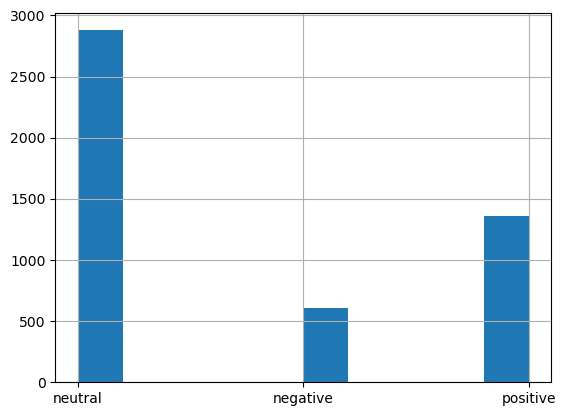

In [12]:
df_['Sentiment'].hist()

In [13]:
target_map={'positive':1,'negative':0,'neutral':2}
df_['target']=df_['Sentiment'].map(target_map)

In [14]:
df_.head()

,Sentiment,Tweet,target
0,neutral,"According to Gran , the company has no plans t...",2
1,neutral,Technopolis plans to develop in stages an area...,2
2,negative,The international electronic industry company ...,0
3,positive,With the new production plant the company woul...,1
4,positive,According to the company 's updated strategy f...,1


In [16]:
df_train,df_test=train_test_split(df_)

In [17]:
df_train.head()

,Sentiment,Tweet,target
568,positive,With this appointment Kaupthing Bank aims to f...,1
1577,neutral,Pharmaceuticals - Belgium This brand-new marke...,2
2723,neutral,`` We have become convinced that we can do tha...,2
2537,neutral,Our customers come from the following countrie...,2
1847,positive,Higher bit rates for outgoing traffic improves...,1


In [18]:
vectorizer=TfidfVectorizer(max_features=2000)

In [22]:
X_train=vectorizer.fit_transform(df_train['Tweet'])

In [23]:
X_train

<3634x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 54623 stored elements in Compressed Sparse Row format>

In [24]:
X_test=vectorizer.transform(df_test['Tweet'])

In [25]:
Y_train=df_train['target']
Y_test=df_test['target']

In [26]:
model=LogisticRegression(max_iter=500)
model.fit(X_train,Y_train)
print("Train acc : ",model.score(X_train,Y_train))
print("Test acc : ",model.score(X_test,Y_test))

Train acc :  0.8560814529444138
Test acc :  0.7607260726072608


In [27]:
Pr_train=model.predict_proba(X_train)
Pr_test=model.predict_proba(X_test)
print("Train AUC : ",roc_auc_score(Y_train,Pr_train,multi_class='ovo'))
print("Test AUC : ",roc_auc_score(Y_test,Pr_test,multi_class='ovo'))

Train AUC :  0.9607371660550615
Test AUC :  0.8733476197262323


In [28]:
P_train=model.predict(X_train)
P_test=model.predict(X_test)

In [29]:
cm=confusion_matrix(Y_train,P_train,normalize='true')
cm

array([[0.58810573, 0.0814978 , 0.33039648],
       [0.00990099, 0.71485149, 0.27524752],
       [0.00599078, 0.01612903, 0.97788018]])

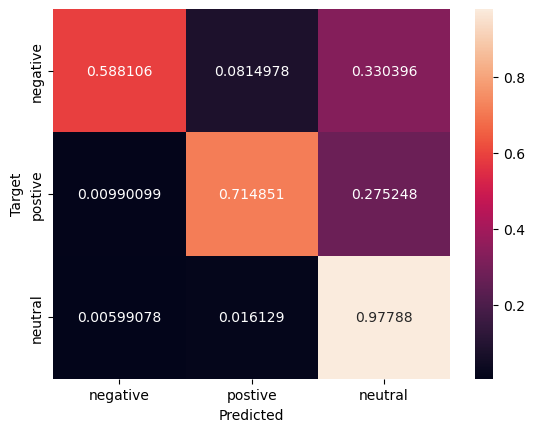

In [30]:
def plot_cm(cm):
    classes=['negative','postive','neutral']
    df_cm=pd.DataFrame(cm,index=classes,columns=classes)
    ax=sn.heatmap(df_cm,annot=True,fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
plot_cm(cm)

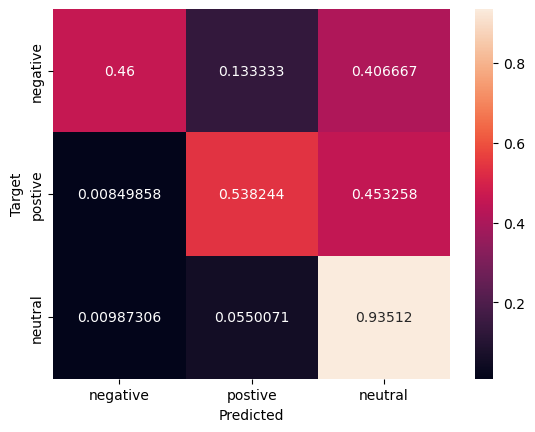

In [31]:
cm_test=confusion_matrix(Y_test,P_test,normalize='true')
plot_cm(cm_test)

In [32]:
binary_target_list=[target_map['positive'],target_map['negative']]
df_b_train=df_train[df_train['target'].isin(binary_target_list)]
df_b_test=df_test[df_test['target'].isin(binary_target_list)]

In [33]:
df_b_train.head()

,Sentiment,Tweet,target
568,positive,With this appointment Kaupthing Bank aims to f...,1
1847,positive,Higher bit rates for outgoing traffic improves...,1
1751,positive,HELSINKI ( Thomson Financial ) - Kone said it ...,1
605,positive,LONDON AFX - Shares in Rautaruukki Corp have b...,1
4051,negative,The fair value change of investment properties...,0


In [35]:
X_train=vectorizer.fit_transform(df_b_train['Tweet'])
X_test=vectorizer.transform(df_b_test['Tweet'])

In [36]:
Y_train=df_b_train['target']
Y_test=df_b_test['target']

In [37]:
model=LogisticRegression(max_iter=500)
model.fit(X_train,Y_train)
print("Train acc : ",model.score(X_train,Y_train))
print("Test acc : ",model.score(X_test,Y_test))

Train acc :  0.8736338797814208
Test acc :  0.8250497017892644


In [39]:
Pr_train=model.predict_proba(X_train)[:,1]
Pr_test=model.predict_proba(X_test)[:,1]
print("Train AUC : ",roc_auc_score(Y_train,Pr_train))
print("Test AUC : ",roc_auc_score(Y_test,Pr_test))

Train AUC :  0.9825969381079078
Test AUC :  0.9256468366383381


In [40]:
model.coef_

array([[ 0.21317184, -0.06006426,  0.06354551, ...,  0.37818107,
         0.24028198,  0.18589929]])

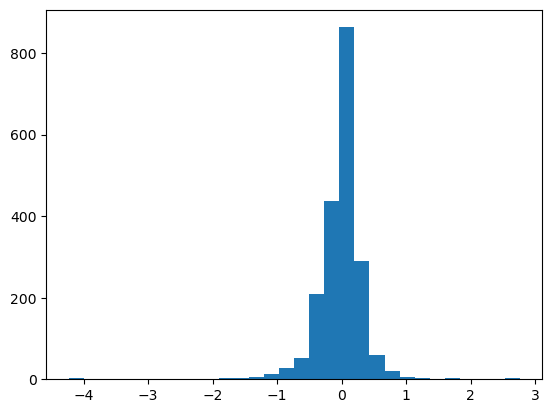

In [41]:
plt.hist(model.coef_[0],bins=30);

In [42]:
word_index_map=vectorizer.vocabulary_
word_index_map

{'with': 1976,
 'this': 1825,
 'kaupthing': 987,
 'bank': 283,
 'aims': 211,
 'to': 1843,
 'further': 780,
 'co': 412,
 'capital': 365,
 'markets': 1128,
 'activities': 174,
 'within': 1977,
 'the': 1815,
 'group': 818,
 'and': 234,
 'improve': 895,
 'overall': 1290,
 'service': 1611,
 'clients': 404,
 'higher': 858,
 'rates': 1465,
 'for': 749,
 'traffic': 1861,
 'end': 631,
 'user': 1904,
 'experience': 701,
 'of': 1232,
 'mobile': 1162,
 'broadband': 341,
 'services': 1612,
 'such': 1743,
 'as': 256,
 'video': 1924,
 'sending': 1603,
 'helsinki': 856,
 'thomson': 1826,
 'financial': 724,
 'kone': 1000,
 'said': 1564,
 'it': 958,
 'has': 840,
 'won': 1979,
 'four': 762,
 'orders': 1273,
 'in': 900,
 'united': 1888,
 'worth': 1987,
 '40': 83,
 'mln': 1160,
 'eur': 661,
 'london': 1073,
 'afx': 200,
 'shares': 1621,
 'rautaruukki': 1467,
 'corp': 492,
 'have': 842,
 'been': 294,
 'upgraded': 1895,
 'hold': 866,
 'from': 768,
 'sell': 1601,
 'by': 353,
 'price': 1389,
 'target': 1778,
 

In [44]:
threshold=1
print("MOST POSTIVE WORDS")
for word,index in word_index_map.items():
    weight=model.coef_[0][index]
    if weight>threshold:
        print(word,weight)

MOST POSTIVE WORDS
with 1.3965134436428512
and 1.089587003846044
rose 2.762415062263238
increase 2.2902818249411974
up 2.616624687753324
signed 1.1586695684741388
improved 1.0565813307596057
grew 1.304760887615054
an 1.2844394237999235
new 1.6514935169845417
increased 1.6849765057967823
growth 1.300603163465599
agreement 1.0310052908384657


In [45]:
print("MOST NEGATIVE WORDS")
for word,index in word_index_map.items():
    weight=model.coef_[0][index]
    if weight<-threshold:
        print(word,weight)

MOST NEGATIVE WORDS
employees -1.1011817676667335
than -1.290310472946901
off -1.4998879890149395
down -4.035913997213037
decreased -4.227704355747727
due -1.2355155807694893
at -1.1508860414399147
dropped -1.666451984601793
loss -1.2427166886017071
situation -1.069341854773471
lower -1.7636731003864345
lay -1.4784080269373059
personnel -1.1522218128858708
2008 -1.1646332335528067
result -1.3373720472590542
issued -1.0485339589317564
warning -1.149839655232424
fell -2.800668150375348
temporary -1.0195800191771578
declined -1.8641056028056604
staff -1.230815768016398
half -1.3871395272682026
had -1.021620182325052
fall -1.1081659928034135
slipped -1.103912905270892
